# Calculating sulfur and trace element evolution during mantle melting. 
- This notebook shows how to use the mantle melting model of Lee et al. (2012) adapted by Wieser et al. (2020) to model how S, Cu and other chalcophile or lithophile elements evolve during mantle melting
- For more information on how the math works, we direct you towards the supporting information of Wieser et al (2020) - https://doi.org/10.1016/j.gca.2020.05.018 - Where the equations are typed out in detail

## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
ss.__version__

'1.0.5'

## Loading silicate modes and KDs
- Here is the place to enter your modes for the silicate mineralogy and the KD values you want to use. 

In [2]:
Modes=pd.DataFrame(data={'ol': 0.6, 'opx': 0.2, 
       'cpx': 0.18, 'sp': 0.02, 'gt': 0}, index=[0])

KDs_Cu=pd.DataFrame(data={'element': 'Cu',
        'ol': 0.048, 'opx': 0.034, 
        'cpx': 0.043, 'sp': 0.223, 
        'gt': 0, 'sulf': 800}, index=[0])

In [3]:
S_Sulf = 33*(10**4)
df_Cu_300S=ss.Lee_Wieser_sulfide_melting(N=30, Modes=Modes,
                        M_Max=0.2,
                        KDs=KDs_Cu,
                        S_Sulf=S_Sulf, elem_Per=30,
                        S_Mantle=[300],
                        S_Melt_SCSS_2_ppm=1000)

## Example 1 - no change in silicate mineralogy
- Because the K$_{D}$ of Cu in sulfide is so much higher than the K$_{D}$ in silicate minerals, the silicate mineralogy really doesnt matter much. For less strongly chalcophile elements, e.g. Pb, that wont be the case. In Example 2, we show how you can deal with the fact that silicate modes will change during melting
- Here, we use 3000 melting steps, run the model from M=1 to M=0.2 (e.g. F from 0 to 0.8), assume sulfides in the mantle have 33 wt% S, and that there is 30 ppm of the element we want to model (Cu here) in the mantle. We assume the mantle initially has 200 ppm of S. 
- Finally, following Lee et al. (2012), we assume that the S content of the melt is fixed at 980 ppm (the SCSS calculated using ONeill and Mavrogenes 1998 'basalt' model)

In [4]:
S_Sulf = 33*(10**4)
df_Cu_200S=ss.Lee_Wieser_sulfide_melting(Modes=Modes, KDs=KDs_Cu,
                        N=3000, S_Mantle=200,
                        S_Sulf=S_Sulf, S_Melt_SCSS_2_ppm=1000,
                        elem_Per=30, Prop_S6=0)
df_Cu_200S.head()

,F,M,Cu_KD,Cu_Melt_Agg,Cu_Melt_Inst,Cu_Residue,S_Residue,S_Melt_Inst,S_Melt_Agg,S_Melt_input,XSulf
0,0.00000,1.00000,0.532620,0.000000,0.000000,30.000000,200.000000,1000.0,1.170192e-311,1000.0,0.000606
1,0.00033,0.99967,0.531979,56.359888,56.359888,29.991295,199.735825,1000.0,1.000000e+03,1000.0,0.000605
2,0.00066,0.99934,0.531338,56.385674,56.411459,29.982568,199.471475,1000.0,1.000000e+03,1000.0,0.000604
3,0.00099,0.99901,0.530697,56.411501,56.463156,29.973818,199.206951,1000.0,1.000000e+03,1000.0,0.000604
4,0.00132,0.99868,0.530055,56.437371,56.514980,29.965045,198.942251,1000.0,1.000000e+03,1000.0,0.000603


In [12]:
## Lets add some S6+, which increases how much S is in the melt. 
S_Sulf = 33*(10**4)
df_Cu_200S_s6=ss.Lee_Wieser_sulfide_melting(Modes=Modes, KDs=KDs_Cu,
                        N=3000, S_Mantle=200,
                        S_Sulf=S_Sulf, S_Melt_SCSS_2_ppm=1000,
                        elem_Per=30, Prop_S6=0.2)
df_Cu_200S_s6.head()

,F,M,Cu_KD,Cu_Melt_Agg,Cu_Melt_Inst,Cu_Residue,S_Residue,S_Melt_Inst,S_Melt_Agg,S_Melt_input,XSulf
0,0.00000,1.00000,0.532620,0.000000,0.000000,30.000000,200.000000,1250.0,1.169220e-311,1250.0,0.000606
1,0.00033,0.99967,0.531779,56.381085,56.381085,29.991288,199.653270,1250.0,1.250000e+03,1250.0,0.000605
2,0.00066,0.99934,0.530938,56.417526,56.453967,29.982547,199.306311,1250.0,1.250000e+03,1250.0,0.000604
3,0.00099,0.99901,0.530096,56.454045,56.527082,29.973776,198.959123,1250.0,1.250000e+03,1250.0,0.000603
4,0.00132,0.99868,0.529254,56.490642,56.600433,29.964974,198.611705,1250.0,1.250000e+03,1250.0,0.000602


Text(0, 0.5, 'S in source')

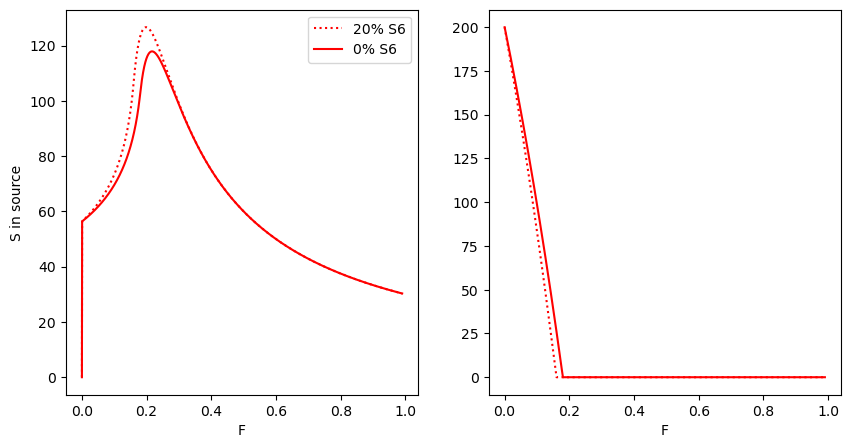

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Cu_200S_s6['F'], df_Cu_200S_s6['Cu_Melt_Agg'], ':r', label='20% S6')
ax1.plot(df_Cu_200S['F'], df_Cu_200S['Cu_Melt_Agg'], '-r', label='0% S6')

ax2.plot(df_Cu_200S_s6['F'], df_Cu_200S_s6['S_Residue'], ':r', label='20% S6')
ax2.plot(df_Cu_200S['F'], df_Cu_200S['S_Residue'], '-r', label='0% S6')
ax1.legend()
ax1.set_xlabel('F')
ax2.set_xlabel('F')
ax1.set_ylabel('Cu in agg melt')
ax1.set_ylabel('S in source')

### Example 1b: We can do the same for any other element, we just need a new set of K$_{D}$s

In [5]:
KDs_Ba=pd.DataFrame(data={'element': 'Ba',
'ol': 0.000005, 'opx': 0.000006, 
'cpx': 0.0004, 'sp': 0.223, 'gt': 0.00007, 'sulf': 0 }, index=[0])

df_Ba_200S=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes,
                        KDs=KDs_Ba,
                        S_Sulf=S_Sulf, elem_Per=6.85,
                        S_Mantle=200,
                        S_Melt_SCSS_2_ppm=1000,
                         Prop_S6=0)
df_Ba_200S.head()

,F,M,Ba_KD,Ba_Melt_Agg,Ba_Melt_Inst,Ba_Residue,S_Residue,S_Melt_Inst,S_Melt_Agg,S_Melt_input,XSulf
0,0.00000,1.00000,0.004533,0.000000,0.000000,6.850000,200.000000,1000.0,1.026046e-311,1000.0,0.000606
1,0.00033,0.99967,0.004533,1408.865815,1408.865815,6.387028,199.735825,1000.0,1.000000e+03,1000.0,0.000605
2,0.00066,0.99934,0.004533,1361.240016,1313.614218,5.955214,199.471475,1000.0,1.000000e+03,1000.0,0.000604
3,0.00099,0.99901,0.004533,1315.751735,1224.775173,5.552470,199.206951,1000.0,1.000000e+03,1000.0,0.000604
4,0.00132,0.99868,0.004533,1272.293504,1141.918809,5.176848,198.942251,1000.0,1.000000e+03,1000.0,0.000603


### Example 1c - Different initial S contents

In [6]:

df_Cu_100S=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes,
                        M_Max=0.2,
                        KDs=KDs_Cu,
                        S_Sulf=S_Sulf, elem_Per=30,
                        S_Mantle=100,
                        S_Melt_SCSS_2_ppm=1000,
                         Prop_S6=0)

df_Cu_300S=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes,
                        M_Max=0.2,
                        KDs=KDs_Cu,
                        S_Sulf=S_Sulf, elem_Per=30,
                        S_Mantle=300,
                        S_Melt_SCSS_2_ppm=1000)

### Now lets plot to see how we expect Cu vs. Ba to evolve for different mantle S contents
- Following Wieser et al. (2020)

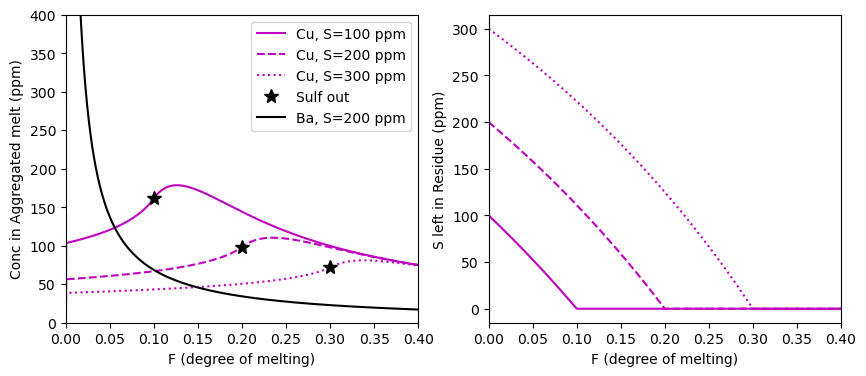

In [7]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10,4), sharex=True)
# 100 ppm
ax1.plot(df_Cu_100S['F'], 
         df_Cu_100S['Cu_Melt_Agg'],
        '-',color='m', ms=10, label='Cu, S=100 ppm')
# Lets add a cross to show the point at which sulfide is exhausted
sulf_out_100=np.take(np.where(df_Cu_100S['S_Residue']==0), 0)
ax1.plot(df_Cu_100S['F'].loc[sulf_out_100], 
         df_Cu_100S['Cu_Melt_Agg'].loc[sulf_out_100],
        '*k', ms=10)

# 200 ppm
ax1.plot(df_Cu_200S['F'], 
         df_Cu_200S['Cu_Melt_Agg'],
        '--', color='m', ms=10, label='Cu, S=200 ppm')
# Lets add a cross to show the point at which sulfide is exhausted
sulf_out_200=np.take(np.where(df_Cu_200S['S_Residue']==0), 0)
ax1.plot(df_Cu_200S['F'].loc[sulf_out_200], 
         df_Cu_200S['Cu_Melt_Agg'].loc[sulf_out_200],
        '*k', ms=10)


# 300pm 
ax1.plot(df_Cu_300S['F'], 
         df_Cu_300S['Cu_Melt_Agg'],
        ':', color='m',ms=10, label='Cu, S=300 ppm')
# Lets add a cross to show the point at which sulfide is exhausted
sulf_out_300=np.take(np.where(df_Cu_300S['S_Residue']==0), 0)
ax1.plot(df_Cu_300S['F'].loc[sulf_out_300], 
         df_Cu_300S['Cu_Melt_Agg'].loc[sulf_out_300],
        '*k', ms=10, label='Sulf out')

ax1.plot(df_Ba_200S['F'], 
         df_Ba_200S['Ba_Melt_Agg'],
        '-', color='k', ms=10, label='Ba, S=200 ppm')

ax1.set_xlabel('F (degree of melting)')
ax1.set_ylabel('Conc in Aggregated melt (ppm)')
ax1.set_xlim([0, 0.4])
ax1.set_ylim([0, 400])

# Show S left in source
ax2.plot(df_Cu_300S['F'],
         df_Cu_300S['S_Residue'],
':', color='m', label='Cu, 300ppm')
ax2.plot(df_Cu_100S['F'],
         df_Cu_100S['S_Residue'],
'-', color='m', label='Cu, 100ppm')
ax2.plot(df_Cu_200S['F'],
         df_Cu_200S['S_Residue'],
'--', color='m', label='Cu, 200ppm')
ax2.set_xlabel('F (degree of melting)')
ax2.set_ylabel('S left in Residue (ppm)')
ax1.legend()
fig.savefig('Cu_Ba_behavoir.png', dpi=300)

In [8]:
df_Cu_300S=ss.Lee_Wieser_sulfide_melting(N=30, Modes=Modes,
                        M_Max=0.2,
                        KDs=KDs_Cu,
                        S_Sulf=S_Sulf, elem_Per=30,
                        S_Mantle=300,
                        S_Melt_SCSS_2_ppm=1000)

## Example 2: Changing Silicate proportions
- Here, we load in a changing silicate mineral mineralogy. This may be an output from Thermocalc, or some empirical 
calculation you have for your system

In [9]:
Lee_df_Sil=pd.read_excel('Lee_Supporting_Info_Melting.xlsx',
                     sheet_name='Lee_tiny_step_ChangingSil')
Lee_df_Sil.head()

,cumulative F melt,mass of peridotite residue,Mass of peridotite Penny's way,ol_i,opx_i,cpx_i,sp_i,Unnamed: 7,ol,opx,...,S ppm solubility,S ppm (solubility),Cu ppm instant,Cu ppm aggregate,Unnamed: 33,lnS,Unnamed: 35,Unnamed: 36,Unnamed: 37,TiO2 wt. % aggregate melt
0,0.0000,1.0000,-0.000501,0.6000,0.2,0.1800,0.02,1.0,0.599670,0.199890,...,980.787209,980.787209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0005,0.9995,-0.000501,0.6005,0.2,0.1795,0.02,1.0,0.600170,0.199890,...,980.787209,980.787209,61.471598,61.471598,NaN,6.697206,810.138903,NaN,0.0005,2.142514
2,0.0010,0.9990,-0.000501,0.6010,0.2,0.1790,0.02,1.0,0.600671,0.199890,...,980.787209,980.787209,61.547315,61.509457,NaN,6.697125,810.073475,NaN,0.0010,2.132959
3,0.0015,0.9985,-0.000501,0.6015,0.2,0.1785,0.02,1.0,0.601171,0.199891,...,980.787209,980.787209,61.623298,61.547404,NaN,6.697044,810.007822,NaN,0.0015,2.123488
4,0.0020,0.9980,-0.000501,0.6020,0.2,0.1780,0.02,1.0,0.601671,0.199891,...,980.787209,980.787209,61.699548,61.585440,NaN,6.696963,809.941945,NaN,0.0020,2.114102


- Now arrange your columns into a dataframe. Here, the modes are labelled in columns ol_i etc. 

In [10]:
Modes2=pd.DataFrame(data={'ol': Lee_df_Sil['ol_i'],
                        'cpx': Lee_df_Sil['cpx_i'],
                        'opx': Lee_df_Sil['opx_i'],
                        'sp': Lee_df_Sil['sp_i'],
                        'gt': Lee_df_Sil['opx_i']*0})

In [11]:
len(Modes2)

1296

In [12]:
df_Cu_200S_changeSi=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes2,
                        M_Max=0.01,
                        KDs=KDs_Cu,
                        S_Sulf=S_Sulf, elem_Per=30,
                        S_Mantle=200,
                        S_Melt_SCSS_2_ppm=1000,
                         Prop_S6=0)

df_Ba_200S_changeSi=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes2,
                        M_Max=0.01,
                        KDs=KDs_Ba,
                        S_Sulf=S_Sulf, elem_Per=6.85,
                        S_Mantle=200,
                        S_Melt_SCSS_2_ppm=1000,
                         Prop_S6=0)

c:\users\penny\box\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\mantle_melting.py:78: UserWarning: You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe
  w.warn('You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe')
c:\users\penny\box\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\mantle_melting.py:78: UserWarning: You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe
  w.warn('You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe')


## and then plot whatever you want!